## Spis treści
 - [Scopes](#Scopes,-Closures-and-Decorators)
 - [Nonlocal zasięg](#Nonlocal-scope)
 - [Domknięcia](#Closures)
 - [Dekoratory](#Decorators)
 - [Dokumentacja dekoratorów](#Dokumentacja-Dekoratorów)
 - - [Jak to naprawić ?](#Jak-to-narpawić-?)
 - [Lub używając funkcji / dekoratoru wraps z functools](#Lub-używając-funkcji-/-dekoratoru-wraps-z-functools)
 - [Mamoizacja](#Memoization)
 - [Built-in narzędzie do memoizacji](#Built-in-narzędzie-do-memoizacji)
 - [Dekoratory z parametrami](#Dekoratory-z-parametrami)
 - [Dekorator jako klasa](#[-!-]-Dekorator-jako-klasa)
 - [Dekorowanie klas](#Dekorowanie-klas)

# Scopes, Closures and Decorators

In [1]:
a = 10

In [2]:
def my_func():
    print(a) # Używa zmiennej z Global Scope, ale podczas kompilacji zmienna `a` jest w Local Scope
    a = 'Hello world' #  |
    print(a) #        <--|

In [3]:
my_func()

UnboundLocalError: local variable 'a' referenced before assignment

---

In [4]:
b = 10

In [5]:
def my_func2():
    print(b) # Używa zmiennej z Global Scope

In [6]:
my_func2()

10


# Nonlocal scope

In [7]:
a = 10 # Global Scope

In [8]:
def my_func():
    
    def inner_func():
        print(a) # Szuka w Local Scope (inner_func) -> Local Scope (my_func) -> Global Scope
        
    inner_func()

In [12]:
my_func()

20


In [13]:
a = 10

In [14]:
def my_func():
    
    a = 20 
    
    def inner_func():
        print(a) # Szuka w Local Scope (inner_func) -> Local Scope (my_func)
        
    inner_func()

In [15]:
my_func()

20


# Closures

In [1]:
def outer():
    x = 'python'
    print(hex(id(x)))
    def inner():
        x = 'python'
        print(hex(id(x)))
        
    return inner

In [2]:
f = outer()

0x10c8a51b0


In [3]:
f()

0x10c8a51b0


---

In [7]:
def outer():
    x = [1, 2, 3]
    print(hex(id(x)))
    def inner():
        x = [1, 2, 3]
        print(hex(id(x)))
        
    return inner

In [8]:
f = outer()

0x10f0c0ac0


In [9]:
f()

0x10f0645c0


---

# Decorators

### Jak działa dekorator

In [12]:
def counter(fn):
    count = 0
    
    def inner(*args, **kwargs):
        nonlocal count
        count += 1
        print(f'Function {fn.__name__} was called {count} times')
        
        return fn(*args, **kwargs)
    
    return inner

In [13]:
def add(a, b):
    return a + b

In [14]:
add(1, 3)

4

In [15]:
add = counter(add) # Tworzymy tą samą funkcje tylko z dodatkowymi możliwościami

In [16]:
add(1, 3)

Function add was called 1 times


4

In [17]:
add(1, 3)

Function add was called 2 times


4

In [18]:
add(1, 3)

Function add was called 3 times


4

---

## Dokumentacja Dekoratorów

In [30]:
# Tworzymy dekorator
def counter(fn):
    count = 0
    
    def inner(*args, **kwargs):
        """
        Inner function of decorator
        """
        nonlocal count
        count += 1
        print(f'Function {fn.__name__} was called {count} times')
        
        return fn(*args, **kwargs)
    
    return inner

In [31]:
def mult(a: int, b: int) -> int:
    return a * b

In [32]:
help(mult)

Help on function mult in module __main__:

mult(a: int, b: int) -> int



In [33]:
@counter # Bo `counter` zwraca `inner`
def mult(a: int, b: int) -> int:
    return a * b

In [34]:
help(mult)

Help on function inner in module __main__:

inner(*args, **kwargs)
    Inner function of decorator



## Jak to narpawić ?

In [35]:
# Tworzymy dekorator
def counter(fn):
    count = 0
    
    def inner(*args, **kwargs):
        """
        Inner function of decorator
        """
        nonlocal count
        count += 1
        print(f'Function {fn.__name__} was called {count} times')
        
        return fn(*args, **kwargs)
    
    inner.__name__ = fn.__name__
    inner.__doc__ = fn.__doc__
    
    return inner

In [36]:
def mult(a: int, b: int) -> int:
    return a * b

In [37]:
help(mult)

Help on function mult in module __main__:

mult(a: int, b: int) -> int



In [38]:
@counter
def mult(a: int, b: int) -> int:
    return a * b

In [39]:
help(mult)

Help on function mult in module __main__:

mult(*args, **kwargs)



## Lub używając funkcji / dekoratoru `wraps` z `functools`

In [40]:
from functools import wraps

In [42]:
def counter(fn):
    count = 0
    
    @wraps(fn)
    def inner(*args, **kwargs):
        """
        Inner function of decorator
        """
        nonlocal count
        count += 1
        print(f'Function {fn.__name__} was called {count} times')
        
        return fn(*args, **kwargs)
    
    return inner

In [43]:
def mult(a: int, b: int) -> int:
    return a * b

In [44]:
help(mult)

Help on function mult in module __main__:

mult(a: int, b: int) -> int



In [45]:
@counter
def mult(a: int, b: int) -> int:
    return a * b

In [46]:
help(mult)

Help on function mult in module __main__:

mult(a: int, b: int) -> int



---

# Memoization 

In [1]:
# licznik Fibonacci 

In [4]:
def fib(n):
    print('Counting fib for {0}'.format(n))
    return 1 if n < 3 else fib(n-1) + fib(n-2)

In [5]:
fib(10)

Counting fib for 10
Counting fib for 9
Counting fib for 8
Counting fib for 7
Counting fib for 6
Counting fib for 5
Counting fib for 4
Counting fib for 3
Counting fib for 2
Counting fib for 1
Counting fib for 2
Counting fib for 3
Counting fib for 2
Counting fib for 1
Counting fib for 4
Counting fib for 3
Counting fib for 2
Counting fib for 1
Counting fib for 2
Counting fib for 5
Counting fib for 4
Counting fib for 3
Counting fib for 2
Counting fib for 1
Counting fib for 2
Counting fib for 3
Counting fib for 2
Counting fib for 1
Counting fib for 6
Counting fib for 5
Counting fib for 4
Counting fib for 3
Counting fib for 2
Counting fib for 1
Counting fib for 2
Counting fib for 3
Counting fib for 2
Counting fib for 1
Counting fib for 4
Counting fib for 3
Counting fib for 2
Counting fib for 1
Counting fib for 2
Counting fib for 7
Counting fib for 6
Counting fib for 5
Counting fib for 4
Counting fib for 3
Counting fib for 2
Counting fib for 1
Counting fib for 2
Counting fib for 3
Counting fi

55

In [6]:
# licznik Fibonacci z cache

In [10]:
class Fib:
    
    def __init__(self):
        self.cache = {1: 1, 2: 1}
        
    def fib(self, n):
        if n not in self.cache:
            print('Calculating fib for {0}'.format(n))
            self.cache[n] = self.fib(n-1) + self.fib(n-2)
        return self.cache[n]

In [11]:
f = Fib()

In [14]:
# Jak program widzi że coś jest w `cache`, używa tego, jak nie to liczy i zapisuje do `cache`

f.fib(10)

55

### Jak używać cache

In [32]:
def memoize(fn):
    cache = dict()
    
    def inner(n):
        if n not in cache:
            cache[n] = fn(n)
        return cache[n]
    
    return inner

In [18]:
def fib(n):
    print('Counting fib for {0}'.format(n))
    return 1 if n < 3 else fib(n-1) + fib(n-2)

In [19]:
# Nadmiernie liczy tą samą liczbę kilka razy ( dlaczego nie zapisać już policzone liczby ? )

fib(10)

Counting fib for 10
Counting fib for 9
Counting fib for 8
Counting fib for 7
Counting fib for 6
Counting fib for 5
Counting fib for 4
Counting fib for 3
Counting fib for 2
Counting fib for 1
Counting fib for 2
Counting fib for 3
Counting fib for 2
Counting fib for 1
Counting fib for 4
Counting fib for 3
Counting fib for 2
Counting fib for 1
Counting fib for 2
Counting fib for 5
Counting fib for 4
Counting fib for 3
Counting fib for 2
Counting fib for 1
Counting fib for 2
Counting fib for 3
Counting fib for 2
Counting fib for 1
Counting fib for 6
Counting fib for 5
Counting fib for 4
Counting fib for 3
Counting fib for 2
Counting fib for 1
Counting fib for 2
Counting fib for 3
Counting fib for 2
Counting fib for 1
Counting fib for 4
Counting fib for 3
Counting fib for 2
Counting fib for 1
Counting fib for 2
Counting fib for 7
Counting fib for 6
Counting fib for 5
Counting fib for 4
Counting fib for 3
Counting fib for 2
Counting fib for 1
Counting fib for 2
Counting fib for 3
Counting fi

55

In [20]:
@memoize
def fib(n):
    print('Counting fib for {0}'.format(n))
    return 1 if n < 3 else fib(n-1) + fib(n-2)

In [21]:
# Np. Liczy 10 -> zapisuję do `cache` -> potrzebuje 10 -> patrzy w `cache` -> widzi 10 -> używa 10 z `cache`
fib(10)

55

In [39]:
# Cały `ceche` nie został wycofany dlatego przy powtórnym liczeniu będą użyte już obliczone wartości

fib(14)

Counting fib for 14
Counting fib for 13


377

In [41]:
def fact(n):
    print('Calculating fact for {0}'.format(n))
    return 1 if n < 2 else n * fact(n-1)

In [42]:
fact(10)

Calculating fact for 10
Calculating fact for 9
Calculating fact for 8
Calculating fact for 7
Calculating fact for 6
Calculating fact for 5
Calculating fact for 4
Calculating fact for 3
Calculating fact for 2
Calculating fact for 1


3628800

In [43]:
@memoize
def fact(n):
    print('Calculating fact for {0}'.format(n))
    return 1 if n < 2 else n * fact(n-1)

In [44]:
fact(10)

Calculating fact for 10
Calculating fact for 9
Calculating fact for 8
Calculating fact for 7
Calculating fact for 6
Calculating fact for 5
Calculating fact for 4
Calculating fact for 3
Calculating fact for 2
Calculating fact for 1


3628800

In [45]:
fact(12)

Calculating fact for 12
Calculating fact for 11


479001600

---

## Built-in narzędzie do memoizacji

In [46]:
from functools import lru_cache # lru - Least Recently Used

In [47]:
@lru_cache
def fib(n):
    print('Counting fib for {0}'.format(n))
    return 1 if n < 3 else fib(n-1) + fib(n-2)

In [48]:
fib(10)

Counting fib for 10
Counting fib for 9
Counting fib for 8
Counting fib for 7
Counting fib for 6
Counting fib for 5
Counting fib for 4
Counting fib for 3
Counting fib for 2
Counting fib for 1


55

In [53]:
# UWAGA ! maxsize zawsze lepiej ustawiać na potęgę dwójki ( 2, 4, 8, 16, 32 . . . )
@lru_cache(maxsize=8)
def fib(n):
    print('Counting fib for {0}'.format(n))
    return 1 if n < 3 else fib(n-1) + fib(n-2)

In [54]:
fib(8)

Counting fib for 8
Counting fib for 7
Counting fib for 6
Counting fib for 5
Counting fib for 4
Counting fib for 3
Counting fib for 2
Counting fib for 1


21

`cache` teraz przechowywa 8 liczb Fibonacci

In [55]:
# Bo 9 nie ma w cache

fib(9)

# A teraz już jest

Counting fib for 9


34

In [56]:
# Bo 1 była najstarszym elementem w cache, dlatego została usunięta

fib(1)

Counting fib for 1


1

---

# Dekoratory z parametrami

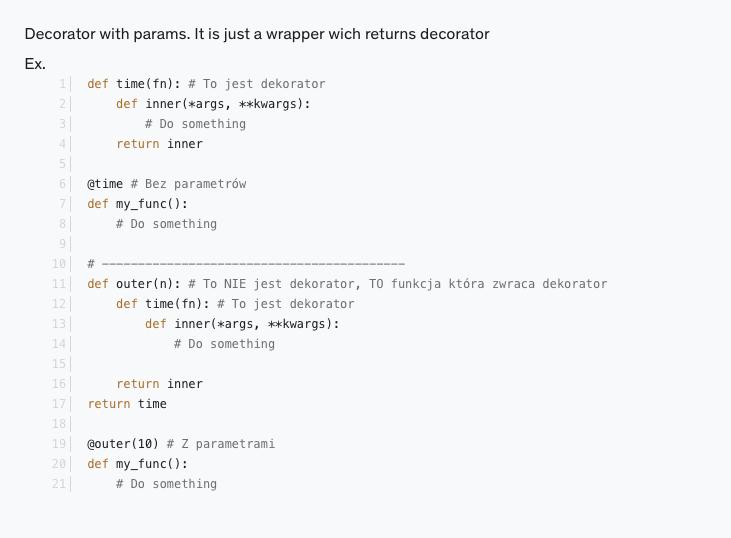

In [2]:
def calc_fib_rec(n): # Rekurencyjna funkcja do liczenia liczb fibonacciego
    return 1 if n < 3 else calc_fib_rec(n-2) + calc_fib_rec(n-1)

In [3]:
calc_fib_rec(10)

55

In [10]:
# Dekorator który mierzy czas wykonywania funkcji

def time(fn):
    from time import perf_counter
    
    def inner(*args, **kwargs):
        start = perf_counter()
        result = fn(*args, **kwargs)
        end = perf_counter()
        print('Runing function {0} takes {1:.6f}s'.format(fn.__name__, end-start))
        
        return result
    return inner

In [11]:
@time
def calc_fib_rec(n): # Rekurencyjna funkcja do liczenia liczb fibonacciego
    return 1 if n < 3 else calc_fib_rec(n-2) + calc_fib_rec(n-1)

In [12]:
calc_fib_rec(5) # Ponieważ funkcja jest rekurencyjna, dekorator się wywołuję podczas każdej iteracji

Runing function calc_fib_rec takes 0.000001s
Runing function calc_fib_rec takes 0.000001s
Runing function calc_fib_rec takes 0.000499s
Runing function calc_fib_rec takes 0.000001s
Runing function calc_fib_rec takes 0.000001s
Runing function calc_fib_rec takes 0.000000s
Runing function calc_fib_rec takes 0.000019s
Runing function calc_fib_rec takes 0.000035s
Runing function calc_fib_rec takes 0.000551s


5

In [15]:
def calc_fib_rec(n): # Rekurencyjna funkcja do liczenia liczb fibonacciego
    return 1 if n < 3 else calc_fib_rec(n-2) + calc_fib_rec(n-1)

In [16]:
@time
def fib(n):
    return calc_fib_rec(n)

In [24]:
fib(20)

Runing function fib takes 0.006907s


6765

### Dekorator ( z parametrem ) do obliczania średniego czasu wykonywania funkcji

In [52]:
def time(reps): # to NIE jest dekorator, TO funkcja która zrwaca dekorator
    
    def dec(fn): # to JEST dekorator
        from time import perf_counter

        def inner(*args, **kwargs):
            total = 0
            for i in range(reps):
                start = perf_counter()
                result = fn(*args, **kwargs)
                end = perf_counter()
                
                total += (end - start)
                                
            avg_time = total / reps

            print('Avg Run time: {0:.6f} ({1} times)'.format(avg_time, reps))

            return result
        return inner
    return dec

In [53]:
@time(5)
def fib(n):
    return calc_fib_rec(n)

In [54]:
fib(28)

Avg Run time: 0.052958 (5 times)


317811

## [ ! ] Dekorator jako klasa

In [5]:
class MyClass:
    def __init__(self, a, b):
        self.a = a
        self.b = b
        
    def __call__(self):
        print('decorator called a={0} b={1}'.format(self.a, self.b))
        def inner(*args, **kwargs):
            print('Doing somethnig')
            
        return inner

In [6]:
obj = MyClass(10, 20)

In [7]:
obj()

decorator called a=10 b=20


<function __main__.MyClass.__call__.<locals>.inner(*args, **kwargs)>

In [11]:
class MyClass:
    def __init__(self, a, b):
        self.a = a
        self.b = b
        
    def __call__(self, fn):
        def inner(*args, **kwargs):
            print('decorator called a={0} b={1}'.format(self.a, self.b))
            fn(*args, **kwargs)
            
        return inner

In [12]:
@MyClass(10, 20)
def my_func():
    print('Doing somethnig')

In [13]:
my_func()

decorator called a=10 b=20
Doing somethnig


# Dekorowanie klas

Dekorator może dodawać właściwosći i metody klasom

In [1]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age
    
    def __repr__(self):
        return 'Hi! My name is {0} and I was born in {1}'.format(self.name, self.age)

In [2]:
p1 = Person('John', '1925')

In [3]:
p1

Hi! My name is John and I was born in 1925

In [4]:
p1.debug()

AttributeError: 'Person' object has no attribute 'debug'

In [17]:
def debug(cls):
    cls.debug = lambda self: {'name': self.name, 'age': self.age}
    
    return cls

In [18]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age
    
    def __repr__(self):
        return 'Hi! My name is {0} and I was born in {1}'.format(self.name, self.age)

In [19]:
Person = debug(Person)

In [20]:
p2 = Person('Walter', '1956')

In [22]:
p2.debug()

{'name': 'Walter', 'age': '1956'}

## Dekorator klas

In [26]:
def debug(cls):
    cls.debug = lambda self: {'name': self.name, 'age': self.age}
    
    return cls

In [27]:
@debug
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age
    
    def __repr__(self):
        return 'Hi! My name is {0} and I was born in {1}'.format(self.name, self.age)

In [28]:
p3 = Person('Mark', '1967')

In [49]:
p3.debug()

{'name': 'Mark', 'age': '1967'}

                  /--- function #1
dispatch function ---- function #2
                  \--- function #3